In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [23]:
def mnk_intercept(X, Y, resolution=10000):
    if isinstance(X, pd.Series): X = X.to_numpy()
    if isinstance(Y, pd.Series): Y = Y.to_numpy()
    
    a = (X@Y)/(X@X)
    min_loss = np.sum((Y - a * X)**2)
    def relative_loss(delta):
        return np.sum((Y - (a + delta) * X)**2) / min_loss
    
    delta = 0
    
    step = a / resolution
    while relative_loss(delta) < 2:
        delta += step
    
    
    def f(x):
        return a * x
    
    return a, delta, f

def mnk(X, Y):
    a, b = np.polyfit(X, Y, deg=1)
    
    S_x = np.std(X) ** 2
    S_y = np.std(Y) ** 2
    da = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
    db = da * np.sqrt(np.mean(X**2))
    
    def f(x):
        return a*x + b
    
    return a, b, da, db, f

In [24]:
data = pd.read_csv('rings.csv')
calibration = 0.983

data["r"] = (data["right"] - data["left"]) * calibration / 2
data

,m,color,left,right,r
0,1,l,335,462,62.4205
1,1,d,312,490,87.4870
2,2,l,290,509,107.6385
3,2,d,276,522,120.9090
4,3,l,261,537,135.6540
5,3,d,248,551,148.9245
6,4,l,235,561,160.2290
7,4,d,225,574,171.5335
8,5,l,216,584,180.8720
9,5,d,205,593,190.7020


In [25]:
data_dark = pd.DataFrame(columns=["m", "r"])
data_light = pd.DataFrame(columns=["m", "r"])

data_dark[["m", "r"]] = data[data["color"] == "d"][["m", "r"]]
data_light[["m", "r"]] = data[data["color"] == "l"][["m", "r"]]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


7189.075962209089 50.95742267045502 
 515.3658459273004 345.61005564061435
7178.532431552272 33.91793755515684 
 -3107.8094273590696 230.0426448461108


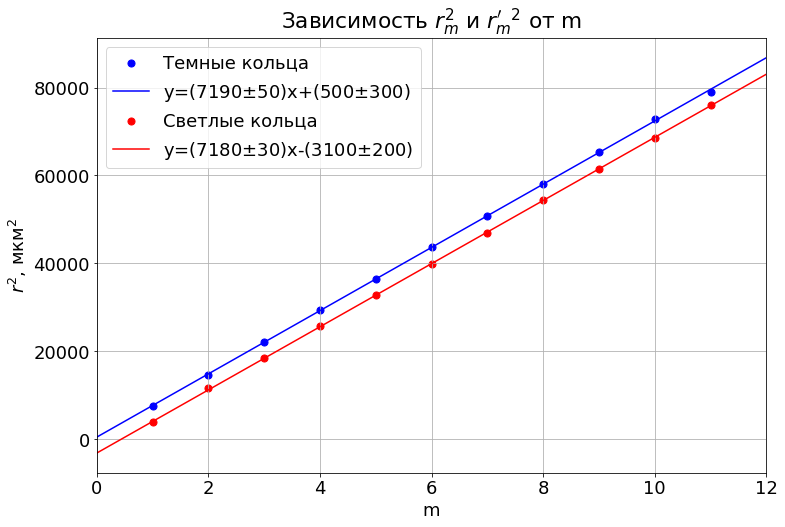

In [60]:
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(12, 8))
plt.grid()

plt.xlabel("m")
plt.ylabel(r"$r^2$, мкм$^2$")
plt.title(r"Зависимость $r_m^2$ и $r_m'^2$ от m")

x_mm = np.array([0, 12])

X = data_dark["m"].to_numpy()
Y = data_dark["r"].to_numpy()**2
a, b, da, db, f = mnk(X, Y)
print(a, da, '\n', b, db)

plt.scatter(X, Y, label="Темные кольца", s=50, color="blue")
plt.plot(x_mm, f(x_mm), color="blue", label="y=(7190$\pm$50)x+(500$\pm$300)")

X = data_light["m"].to_numpy()
Y = data_light["r"].to_numpy()**2
a, b, da, db, f = mnk(X, Y)
print(a, da, '\n', b, db)

plt.scatter(X, Y, label="Светлые кольца", s=50, color="red")
plt.plot(x_mm, f(x_mm), color="red", label="y=(7180$\pm$30)x-(3100$\pm$200)")

plt.legend()

plt.xlim(0, 12)
plt.savefig("../pictures/linearized.eps")

In [63]:
k = 7185 * (10**-8)  #cm**2
dk = 40 * 10**-8

lamda = 577e-7 #cm
dlamda = 10e-7 #cm

R = k / lamda
dR = R * np.sqrt((dk/k)**2 + (dlamda/lamda)**2)

print(R, dR)

1.2452339688041594 0.022667278999381344
